In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Импорт библиотек

In [44]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Чтение файла, а также его преобразование в датафрейм

In [45]:
df.set_index('PassengerID').head()

,Name,PClass,Age,Sex,Survived,SexCode
PassengerID,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Делаем индекс PassengerID основным

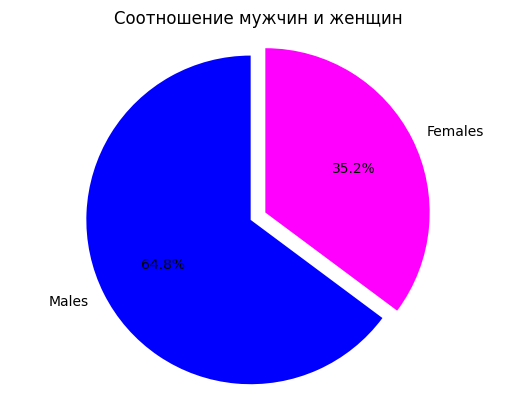

In [46]:
males = (df['Sex'] == 'male').sum()
females = (df['Sex'] == 'female').sum()

proportions = [males, females]

plt.pie(proportions, labels=['Males', 'Females'], colors=['blue', 'magenta'], explode=(0, 0.1), startangle = 90,autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Соотношение мужчин и женщин")
plt.show()

In [47]:
def classCat(row):
    if "1st" in row["PClass"]:
        return 1
    elif "2nd" in row["PClass"]:
        return 2
    else:
        return 3
df['Class'] = df.apply(classCat, axis=1)
df

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode,Class
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,1
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0,1
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0,1


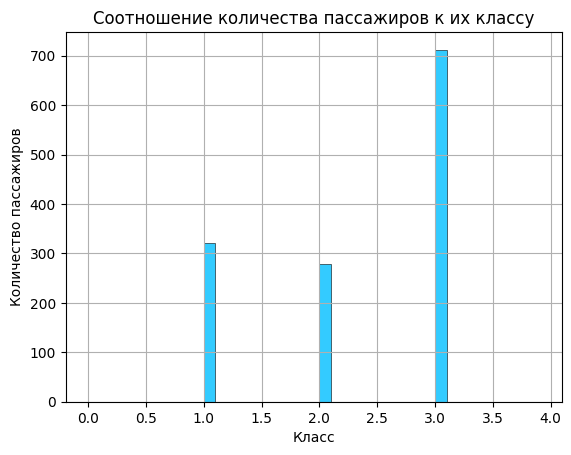

In [48]:
binsVal = np.arange(0, 4, 0.1)
plt.hist(x=df['Class'], bins=binsVal, color = 'deepskyblue', alpha=0.8, align='mid', edgecolor = 'black', linewidth=0.5)
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.title("Соотношение количества пассажиров к их классу")
plt.grid(True)
plt.show()

Создадим гистограмму, на которой отобразим количество пассажиров в каждом классе